In [118]:
import numpy as np
from matplotlib import pyplot as plt

In [119]:
# 计算城市之间欧氏距离
def calc_dis(city1, city2):
    return np.linalg.norm(np.array(city1) - np.array(city2))

# 计算总路线花费
def calc_total_cost(path, dis_map):
    total_cost = 0.0
    len_path = len(path)
    for i in range(len_path - 1):
        total_cost += dis_map[path[i]][path[i+1]]
    return total_cost

In [120]:
# 得到城市之间的距离矩阵
def get_dis_map(citys):
    N = len(citys)
    dis_map = np.zeros((N, N))
    for i, city_x in enumerate(citys):
        single_city = []
        for j, city_y in enumerate(citys):
            if i!=j:
                single_city.append(calc_dis(city_x, city_y))
            else:
                single_city.append(0.0)
        dis_map[i] = single_city
    return dis_map

In [121]:
# 计算微分方程du
def calc_du(V, dis_map):
    col_sum = np.sum(V, axis=0) - 1  # 按列相加
    row_sum = np.sum(V, axis=1) - 1  # 按行相加
    t1 = np.zeros((N, N))
    t2 = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            t1[i, j] = col_sum[j]
            t2[j, i] = row_sum[j]
    # 将第一列移动到最后一列 后 乘以cost矩阵
    t3 = np.dot(dis_map, V[:, [i for i in range(1, N)]+ [0] ])
    return -A * (t1 + t2) - D * t3

In [122]:
# 更新U
def calc_U(U, du, step):
    return U + du * step

# 更新V
def calc_V(U, U0):
    return 0.5 * (1 + np.tanh(U / U0))

# 计算当前网络总能量
def calc_energy(V, dis_map):
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    # 把第一列挪到最后一列 乘以 cost
    t3 = dis_map * (V[:, [i for i in range(1, N)] + [0]])
    t3 = np.sum(np.sum(V * t3))
    return 0.5 * (A * (t1 + t2) + D * t3)

In [123]:
# 获取当前旅游路径
def get_cur_route(V):
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                route += [j]
                break
    return route

In [124]:
# 可视化画出哈密顿回路和能量趋势
def draw_H_and_E(citys, H_path, energys):
    fig = plt.figure()
    # 绘制哈密顿回路
    ax1 = fig.add_subplot(121)
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    for (from_, to_) in H_path:
        p1 = plt.Circle(citys[from_], 0.2, color='red')
        p2 = plt.Circle(citys[to_], 0.2, color='red')
        ax1.add_patch(p1)
        ax1.add_patch(p2)
        ax1.plot((citys[from_][0], citys[to_][0]), (citys[from_][1], citys[to_][1]), color='red')
        ax1.annotate(s=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)
    ax1.axis('equal')
    ax1.grid()
    # 绘制能量趋势图
    ax2 = fig.add_subplot(122)
    ax2.plot(np.arange(0, len(energys), 1), energys, color='red')
    plt.show()

In [198]:
if __name__ == '__main__':
    N = 10 # 城市个数
    city_loc_range = 10 # 城市坐标范围 0~
    citys = np.random.randint(0, city_loc_range, (N,2))
    dis_map = get_dis_map(citys)
    # 设置初始值
    A = N * N
    D = N / 2
    U0 = 0.0009  # 初始电压
    step = 0.0001  # 步长
    epoch = 10000  # 迭代次数

In [199]:
    energys = []  # 每次迭代的能量
    best_distance = np.inf  # 最优距离
    best_route = []  # 最优路线
    H_path = []  # 哈密顿回路

In [200]:
    # 初始化神经网络的输入状态（电路的输入电压U）
    U = 1 / 2 * U0 * np.log(N - 1) + (2 * (np.random.random((N, N))) - 1)
    # 初始化神经网络的输出状态（电路的输出电压V）
    V = calc_V(U, U0)

第68次迭代找到的次优解距离为：42.93647491416894，能量为：305.7698801892987，路径为：
f,d,i,a,g,c,e,b,h,j,f
第330次迭代找到的次优解距离为：39.336958791599585，能量为：296.70919730741963，路径为：
f,d,i,c,g,e,b,a,h,j,f
第826次迭代找到的次优解距离为：36.818230625568646，能量为：839.6400950291868，路径为：
f,d,c,g,b,h,e,a,i,j,f
第1497次迭代找到的次优解距离为：34.60925047537761，能量为：647.988774495656，路径为：
i,c,g,a,b,h,e,f,j,d,i
第1747次迭代找到的次优解距离为：31.845318452877393，能量为：233.88207443166877，路径为：
c,g,a,h,b,e,i,f,j,d,c


<ipython-input-124-7b6fb46c0e8c>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.annotate(s=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)


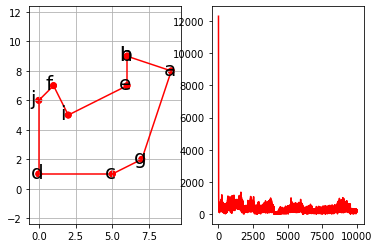

In [201]:
    # 开始迭代训练网络
    for ite in range(epoch):
        # 利用动态方程计算du
        du = calc_du(V, dis_map)
        # 由一阶欧拉法更新下一个时间的输入状态（电路的输入电压U）
        U = calc_U(U, du, step)
        # 由sigmoid函数更新下一个时间的输出状态（电路的输出电压V）
        V = calc_V(U, U0)
        # 计算当前网络的能量E
        energys.append(calc_energy(V, dis_map))
        # 获取当前路径
        route = get_cur_route(V)
        if len(np.unique(route)) == N:
            route.append(route[0])
            total_cost = calc_total_cost(route, dis_map)
            if total_cost < best_distance:
                H_path = []
                best_distance = total_cost
                best_route = route
                for i in range(len(best_route) - 1):
                    H_path.append((route[i], route[i + 1]))
                print('第{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(ite, best_distance, energys[ite]))
                for i, v in enumerate(best_route):
                    print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n')
    if len(H_path) > 0:
        draw_H_and_E(citys, H_path, energys)
    else:
        print('没有找到最优解')